#  Task 26-> Classification Algorithms using scikit-learn

## Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

## Load the dataset


In [2]:
data = pd.read_csv('breast-cancer.csv')

## First 5 rows of dataset

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Check for missing values


In [4]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Encode the target variable


In [5]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

## Split features and target


In [6]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

## Split the data into training and testing sets


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the feature variables


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

# 1. Logistic Regression
Logistic Regression is a linear model for binary classification that estimates probabilities using the logistic (sigmoid) function.

## Types:
### Binary Logistic Regression: 
Used for two-class classification problems.
### Multinomial Logistic Regression: 
Extension for multi-class problems.
### Ordinal Logistic Regression: 
For ordinal response variables.
## Key Parameters:
### penalty: 
Specifies the norm used in the penalization ('l1', 'l2', 'elasticnet', 'none').
### C: 
Inverse of regularization strength; smaller values specify stronger regularization.
### solver: 
Algorithm to use for optimization ('liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga').
### max_iter: 
Maximum number of iterations for solvers to converge.

In [10]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')

Logistic Regression Accuracy: 0.9736842105263158


## ROC Curve for Logistic Regression


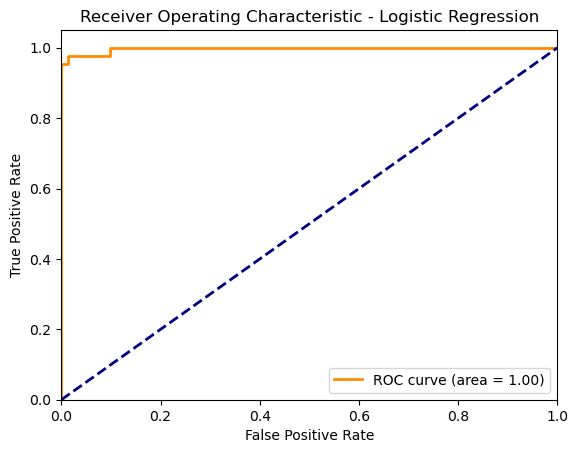

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The ROC curve plots the true positive rate against the false positive rate for Logistic Regression. It helps evaluate the model's ability to discriminate between the two classes.

## Precision-Recall Curve for Logistic Regression


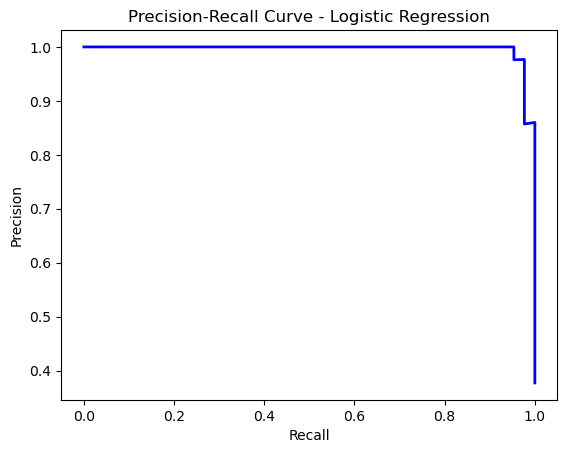

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_log_reg)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

 The Precision-Recall curve highlights the trade-off between precision and recall for Logistic Regression. It is particularly useful when the classes are imbalanced.

## Logistic function:
A logistic function is a mathematical function that produces an S-shaped curve. It's often used to model growth processes where there's a limiting factor. Think of population growth, the spread of a disease, or the probability of an event occurring.

### The Equation:
The logistic function is typically defined as:

## P(x) = L / (1 + e^(-k(x-x0)))

### Where:

P(x) is the value of the function at input x<br>
L is the maximum value (carrying capacity)<br>
k is the growth rate or steepness of the curve<br>
x0 is the inflection point of the curve<br>

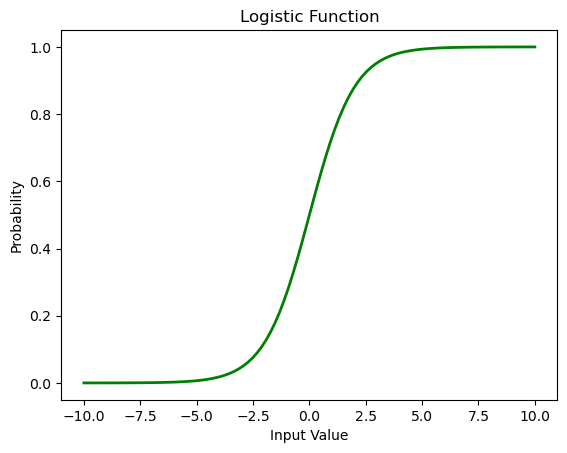

In [14]:
x_values = np.linspace(-10, 10, 100)
y_values = 1 / (1 + np.exp(-x_values))
plt.figure()
plt.plot(x_values, y_values, color='green', lw=2)
plt.xlabel('Input Value')
plt.ylabel('Probability')
plt.title('Logistic Function')
plt.show()

The logistic function graph demonstrates the sigmoid function, which maps input values to probabilities between 0 and 1.

# 2. k-Nearest Neighbors (k-NN)
k-NN classifies a data point based on the majority class of its k nearest neighbors in the feature space.

## Key Parameters:
### n_neighbors: 
Number of neighbors to use.
### weights: 
Weight function used in prediction ('uniform', 'distance', callable).
### algorithm: 
Algorithm to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute').
### p: 
Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean).

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
print(f'k-NN Accuracy: {accuracy_score(y_test, y_pred_knn)}')

k-NN Accuracy: 0.9473684210526315


## Scatter plot for k-NN


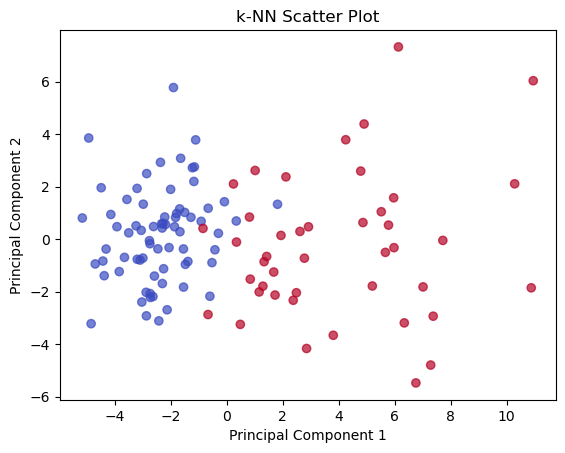

In [17]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_knn, cmap='coolwarm', alpha=0.7)
plt.title('k-NN Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The scatter plot for k-NN visualizes the test data in 2D using PCA. Points are colored based on the predicted class, showing the clustering effect of k-NN.

## ROC Curve for k-NN


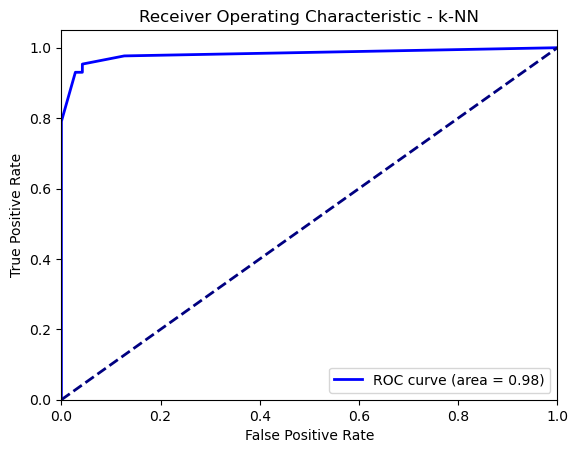

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - k-NN')
plt.legend(loc="lower right")
plt.show()

The ROC curve for k-NN provides insight into the trade-off between true positive rate and false positive rate.The area under the curve (AUC) indicates the overall performance of the k-NN model.

# 3. Support Vector Machines (SVM)
SVM finds the optimal hyperplane that separates classes with the maximum margin.

## Types:
### Linear SVM: 
Uses a linear kernel.
### Non-linear SVM: 
Uses kernels like polynomial, RBF, sigmoid.
## Key Parameters:
### C: 
Regularization parameter; trades off correct classification of training examples against maximization of the decision function’s margin.
### kernel: 
Specifies the kernel type to be used ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed').
### degree: 
Degree of the polynomial kernel function ('poly'). Ignored by other kernels.
### gamma: 
Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.

In [19]:
svm_pca = SVC(kernel='linear', probability=True)
svm_pca.fit(X_test_pca, y_test)

SVC(kernel='linear', probability=True)

In [25]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')

SVM Accuracy: 0.9824561403508771


## Scatter plot for SVM


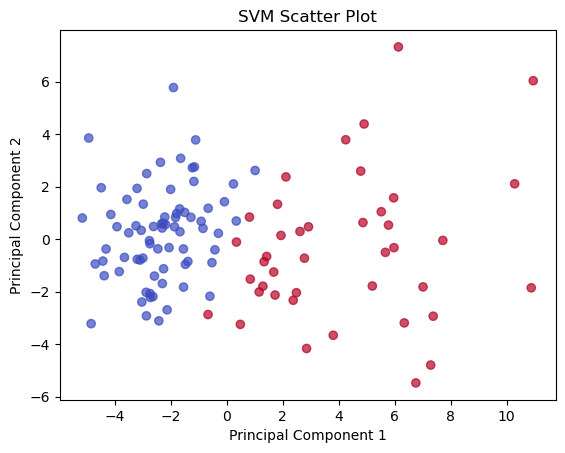

In [26]:
plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_svm, cmap='coolwarm', alpha=0.7)
plt.title('SVM Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The scatter plot for SVM shows the test data in 2D space reduced by PCA, with points colored by SVM predictions. It provides a visual understanding of the decision boundaries created by the SVM model.

## Decision boundary for SVM

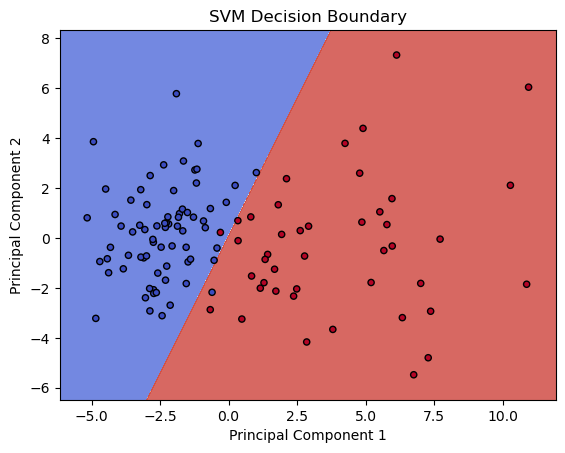

In [27]:
svm_pca = SVC(kernel='linear', probability=True)
svm_pca.fit(X_test_pca, y_test)

# Define the decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the grid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the test points
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title('SVM Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The decision boundary plot for SVM shows how the SVM classifier separates the data into different classes. The shaded areas represent different predicted classes, and the decision boundary is where the class changes.

## ROC Curve for SVM


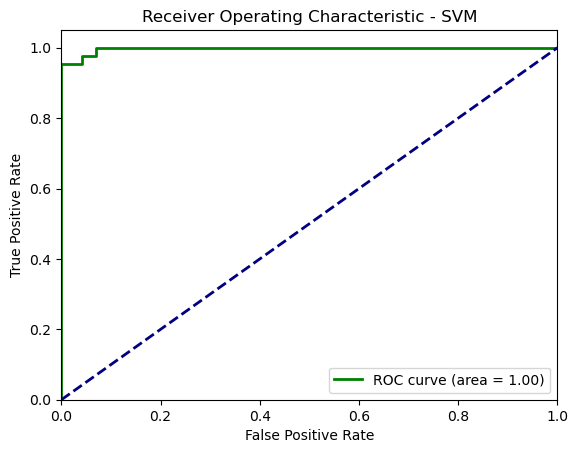

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

The ROC curve for SVM illustrates the model's performance in distinguishing between classes. The curve shows the trade-off between true positive and false positive rates, with the AUC indicating overall performance.


## 4. Decision Trees
Decision Trees split the data into subsets based on feature values to make decisions.

## Key Parameters:
### criterion: 
Function to measure the quality of a split ('gini', 'entropy').
### splitter: 
Strategy used to split at each node ('best', 'random').
### max_depth: 
Maximum depth of the tree.
### min_samples_split: 
Minimum number of samples required to split an internal node.
### min_samples_leaf: 
Minimum number of samples required to be at a leaf node.

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}')

Decision Tree Accuracy: 0.9385964912280702


## Tree visualization


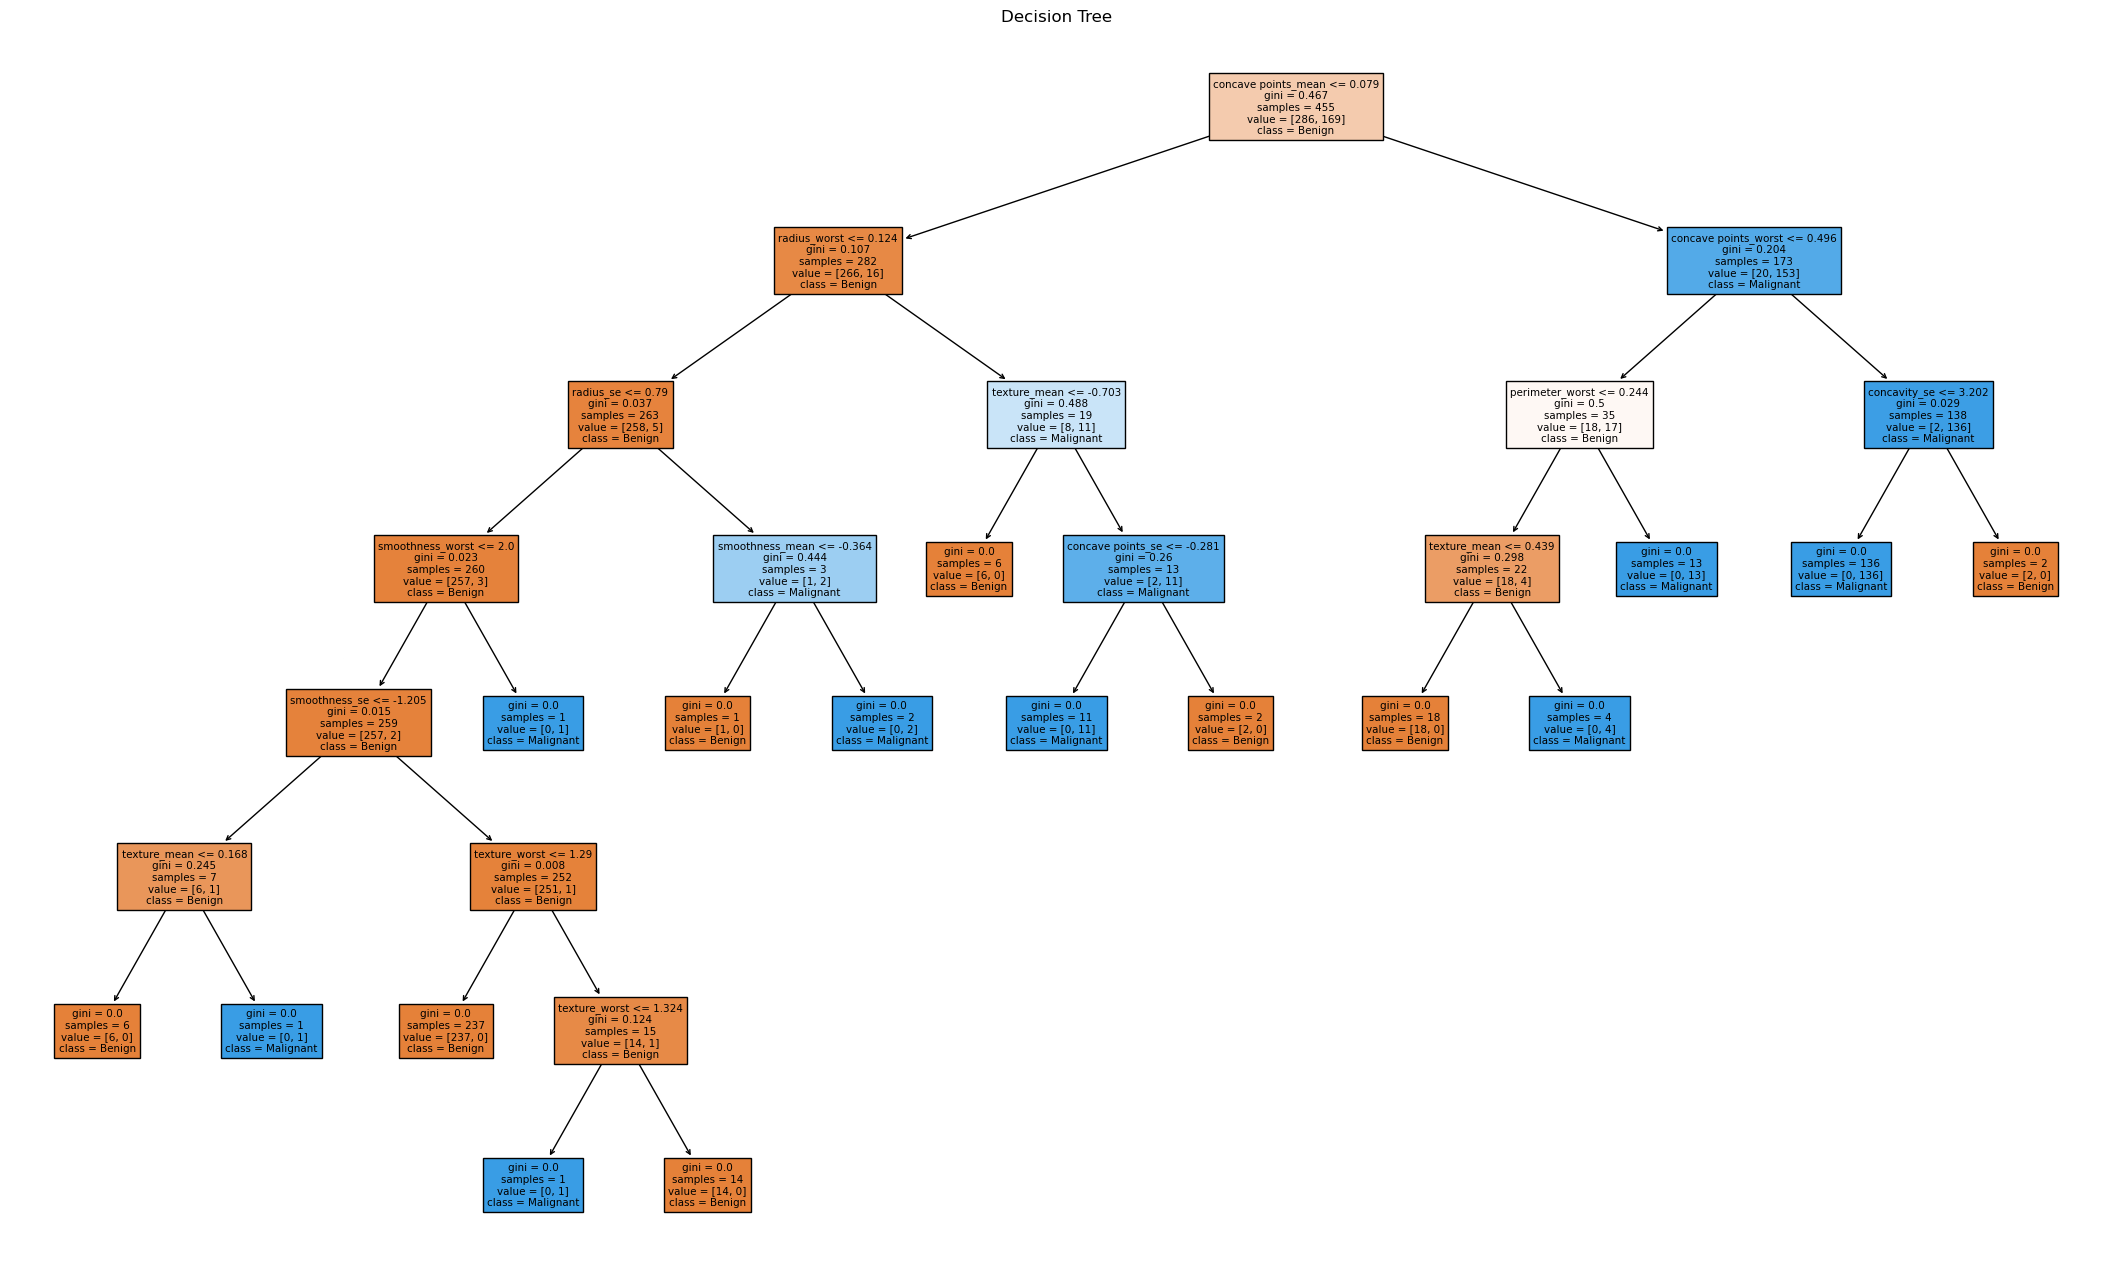

In [31]:
plt.figure(figsize=(27,16))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.title('Decision Tree')
plt.show()

This tree structure visualization shows how the decision tree splits the data at each node to make predictions. It includes feature conditions and class labels.

## Feature importance for Decision Tree


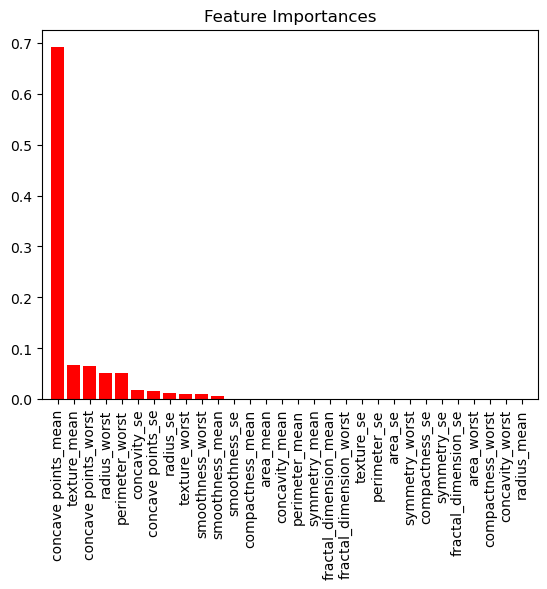

In [32]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature importance plot for the decision tree shows which features are most influential in making predictions. Higher bars indicate more important features.

## ROC Curve for Decision Tree


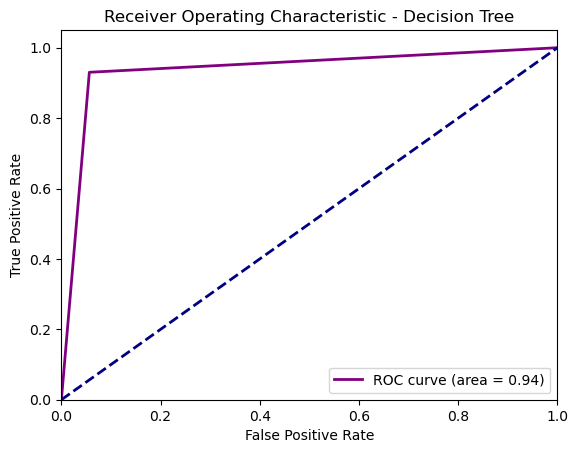

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_prob_tree)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the decision tree shows the balance between the true positive rate and the false positive rate, with the AUC providing an overall performance measure.

# 5. Random Forests
Random Forests are an ensemble of decision trees that improve classification accuracy by averaging multiple trees.

## Key Parameters:
### n_estimators: 
Number of trees in the forest.
### criterion: 
Function to measure the quality of a split ('gini', 'entropy').
### max_depth: 
Maximum depth of the tree.
### min_samples_split: 
Minimum number of samples required to split an internal node.
### min_samples_leaf: 
Minimum number of samples required to be at a leaf node.
### max_features: 
Number of features to consider when looking for the best split.

In [34]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred_forest = forest.predict(X_test)
y_prob_forest = forest.predict_proba(X_test)[:, 1]
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_forest)}')

Random Forest Accuracy: 0.9649122807017544


## Feature importance for Random Forest


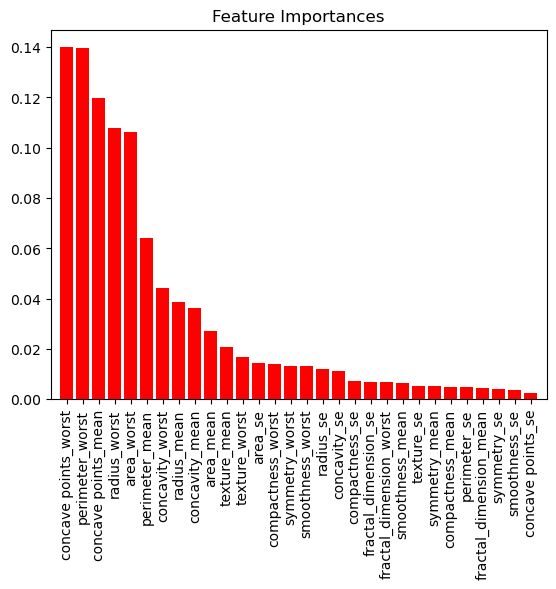

In [36]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature importance plot for the random forest shows which features contribute most to the model's predictions. This helps in understanding the key drivers of the model's decisions.

## Partial Dependence Plot for Random Forest


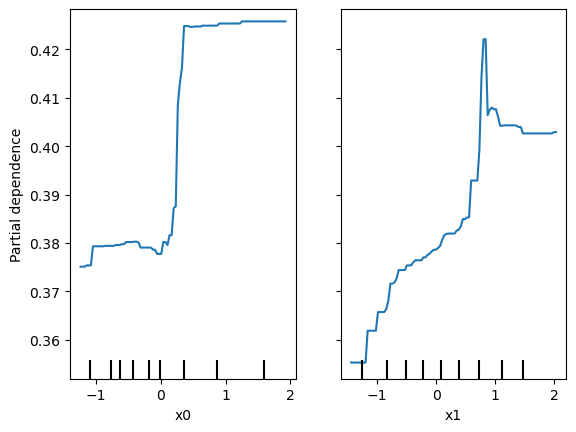

In [37]:
PartialDependenceDisplay.from_estimator(forest, X_test, features=[0, 1])
plt.show()

The partial dependence plot shows the effect of selected features on the predicted outcome, helping understand the relationship between feature values and predictions.

## ROC Curve for Random Forest


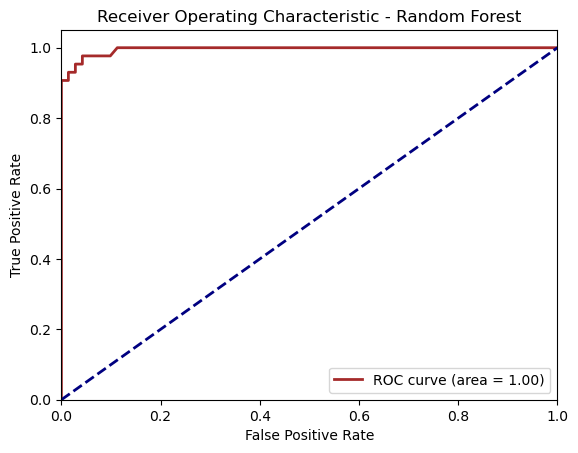

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_prob_forest)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='brown', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the random forest shows the trade-off between the true positive rate and the false positive rate, with the AUC indicating the model's performance.

# 6. Gradient Boosting
Gradient Boosting builds models sequentially, each correcting errors of the previous one to improve performance.

## Key Parameters:
### n_estimators: 
Number of boosting stages to be run.
### learning_rate: 
Shrinks the contribution of each tree by learning_rate.
### max_depth: 
Maximum depth of the individual regression estimators.
### min_samples_split: 
Minimum number of samples required to split an internal node.
### min_samples_leaf: 
Minimum number of samples required to be at a leaf node.
### subsample: 
Fraction of samples used for fitting the individual base learners.

In [39]:
gboost = GradientBoostingClassifier(n_estimators=100)
gboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
y_pred_gboost = gboost.predict(X_test)
y_prob_gboost = gboost.predict_proba(X_test)[:, 1]
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gboost)}')

Gradient Boosting Accuracy: 0.956140350877193


## Feature importance for Gradient Boosting


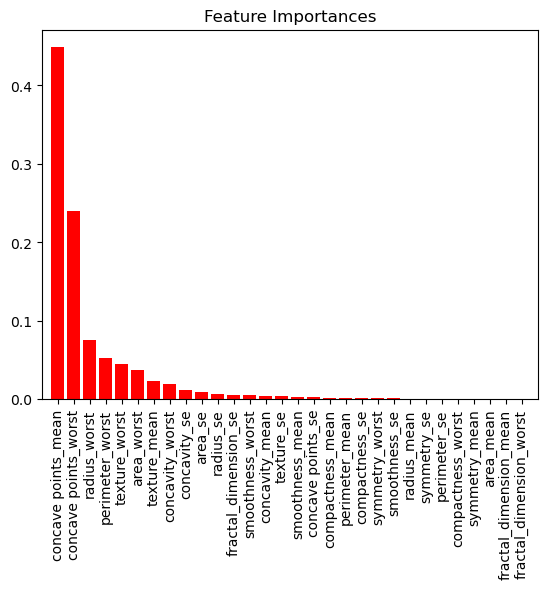

In [41]:
importances = gboost.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature importance plot for gradient boosting indicates which features are most important for predictions. Higher bars show more significant features.

## Learning Curve for Gradient Boosting


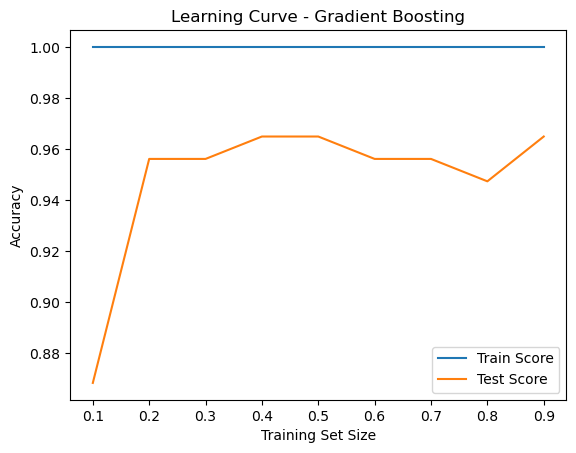

In [42]:
train_sizes = np.linspace(0.1, 0.9, 9)
train_scores = []
test_scores = []
for train_size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    gboost.fit(X_train_part, y_train_part)
    train_scores.append(gboost.score(X_train_part, y_train_part))
    test_scores.append(gboost.score(X_test, y_test))

plt.figure()
plt.plot(train_sizes, train_scores, label='Train Score')
plt.plot(train_sizes, test_scores, label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Gradient Boosting')
plt.legend()
plt.show()

The learning curve for gradient boosting shows the model's performance with varying training set sizes, helping to detect potential overfitting or underfitting.

## ROC Curve for Gradient Boosting


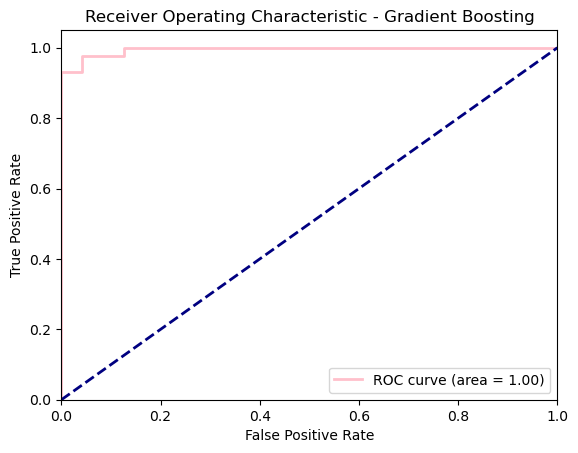

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_prob_gboost)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

The ROC curve for gradient boosting highlights the balance between true positive and false positive rates, with the AUC measuring the model's effectiveness.

# 7. Naive Bayes
Naive Bayes classifiers apply Bayes' theorem with an assumption of feature independence.

## Types:
### Gaussian Naive Bayes: 
Assumes that the features follow a Gaussian distribution.
### Multinomial Naive Bayes: 
Used for discrete counts, like word counts in text classification.
### Bernoulli Naive Bayes: 
Used for binary/boolean features.
## Key Parameters:
### alpha: 
Additive (Laplace/Lidstone) smoothing parameter.
### fit_prior: 
Whether to learn class prior probabilities or not.
### class_prior: 
Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.
##Understanding the Parameters in Detail
### Regularization Parameters:
#### C (Logistic Regression, SVM): 
Controls the trade-off between achieving a low training error and a low testing error. A smaller C values means stronger regularization.
### Kernel Parameters:
#### kernel (SVM): 
Determines the type of hyperplane used to separate the data. Common kernels include:
##### linear: 
Simple linear hyperplane.
##### poly: 
Polynomial hyperplane.
##### rbf: 
Radial basis function (Gaussian).
##### sigmoid: 
Hyperbolic tangent.
#### Depth Parameters:
##### max_depth (Decision Trees, Random Forests, Gradient Boosting): 
Prevents the trees from growing too deep, which can help in preventing overfitting.
#### Leaf and Split Parameters:
##### min_samples_split, min_samples_leaf (Decision Trees, Random Forests, Gradient Boosting): 
These parameters ensure that a minimum number of samples are required to split an internal node or be at a leaf node, which helps to make the model more generalizable.
#### Boosting Parameters:
n_estimators, learning_rate (Gradient Boosting): 
Number of boosting stages and the learning rate that controls the contribution of each tree. A smaller learning rate requires more boosting stages to reach the same performance.

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')

Naive Bayes Accuracy: 0.9649122807017544


## Bar chart for Naive Bayes


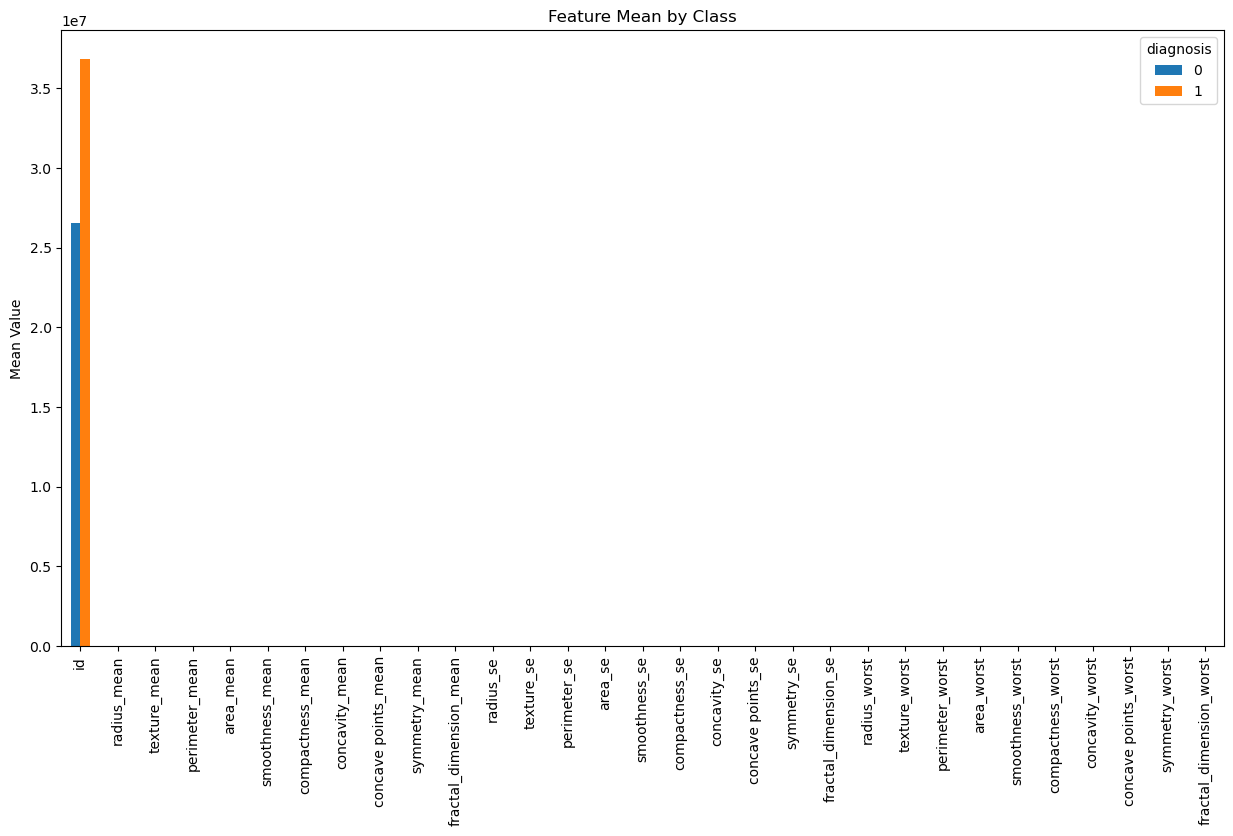

In [46]:
features_mean = data.groupby('diagnosis').mean()
features_mean.T.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Mean by Class')
plt.ylabel('Mean Value')
plt.show()

The bar chart shows the mean values of features for each class, providing insight into how different features vary between classes.

## Confusion matrix for Naive Bayes


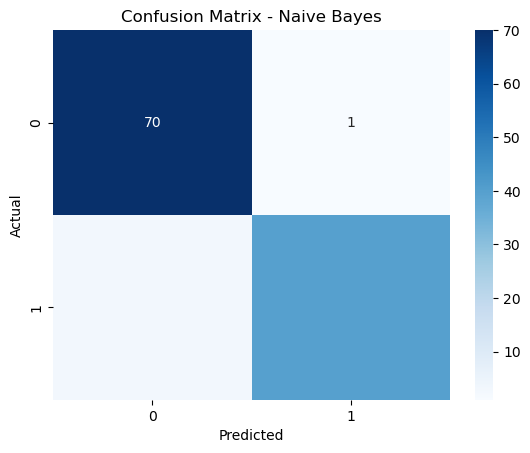

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions, helping evaluate the model's classification performance.

## ROC Curve for Naive Bayes


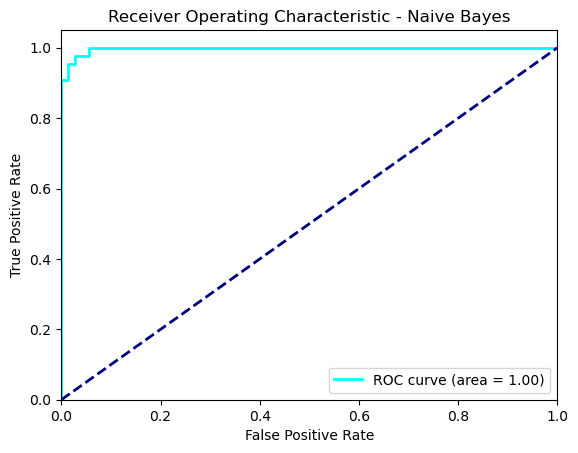

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='cyan', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

The ROC curve for Naive Bayes demonstrates the model's ability to distinguish between classes, with the AUC indicating overall performance.